#           Visualization of omnics datasets 1:

# Volcano plots and Venn diagram analyses 

## Prerequisite(s):
* **preprocessing modules**
* **diffexpanalysis modules** 

## Purpose:
Here, we show the user how to visualize the omnics dataset through volcano plots and venn diagrams of differentially expressed elements. These graphs are helpful in judging the genetic changes of cells being in a particular conditions or harboring particular mutation(s) based on the number of **differentially expressed elements**. In addition, we can make hypotheses about the relationships between the different conditions based on how changes in each condition(s) are overlapping with each other. 

Before starting, we import the required packages for this module.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sts
from statsmodels.stats import multitest
import matplotlib
from venn import venn
##########################################################
#Optional: increase dpi of plt.show() and change font size of label axis
##########################################################

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 200
matplotlib.rc('xtick', labelsize=13)
matplotlib.rc('ytick', labelsize=13)

## Sources for learning graphing basics in Python

Visualizations using Python are powerful and beautiful. However, it is steep learning curve for Python user who are beginning. Here are some source(s) for introductory lessons on visualization using Python:
> https://towardsdatascience.com/introduction-to-data-visualization-in-python-89a54c97fbed

In addition, for troubleshooting or customization of graphs, the Stack Overflow community provides wide ranges of discussions and helps for these type of things. 
> https://stackoverflow.com/

## Trial 1: Volcano plots of differentially expressed elements

In [51]:
data_cleaned = pd.read_excel('cleaned_trial1.xlsx')
data_cleaned.head()

,Unnamed: 0,Accession,Gene function,"Abundances (Normalized): F7: Sample, Bio Rep1, SP7","Abundances (Normalized): F8: Sample, Bio Rep2, SP7","Abundances (Normalized): F9: Sample, Bio Rep3, SP7","Abundances (Normalized): F4: Sample, Bio Rep1, CheA4","Abundances (Normalized): F5: Sample, Bio Rep2, CheA4","Abundances (Normalized): F6: Sample, Bio Rep3, CheA4","Abundances (Normalized): F1: Sample, Bio Rep1, CheA1CheA4","Abundances (Normalized): F2: Sample, Bio Rep2, CheA1CheA4","Abundances (Normalized): F3: Sample, Bio Rep3, CheA1CheA4"
0,0,A0A0P0FBD5,Uncharacterized protein,4.199953e+08,5.327991e+08,1.449827e+08,6.119378e+07,1.042649e+08,1.139954e+08,2.483043e+07,2.529656e+07,3.566432e+07
1,1,A0A0P0F6W5,Uncharacterized protein,1.155383e+07,6.643362e+06,1.302690e+07,3.419722e+07,3.787835e+07,3.694340e+07,1.599574e+07,1.121537e+07,2.037844e+07
2,2,A0A0N7I7H6,Uncharacterized protein,2.349336e+09,2.385109e+09,2.635075e+09,6.572775e+08,6.953822e+08,6.456934e+08,2.195988e+09,2.295658e+09,2.148146e+09
3,3,A0A0P0ENT2,Uncharacterized protein,1.385459e+08,2.930326e+08,3.267244e+08,2.197483e+07,2.720034e+07,1.437205e+07,1.708144e+08,2.937530e+08,1.056491e+08
4,4,A0A0P0EGU7,Uncharacterized protein,7.191629e+09,7.548888e+09,2.844535e+09,2.296458e+08,2.342704e+08,2.118544e+08,1.384437e+10,1.546637e+10,2.970876e+09


In [52]:
data_DEPs = pd.read_excel('cleaned_trial1_analyzed.xlsx')
data_DEPs.head()

,Unnamed: 0,Accession,Gene function,"Abundances (Normalized): F7: Sample, Bio Rep1, SP7","Abundances (Normalized): F8: Sample, Bio Rep2, SP7","Abundances (Normalized): F9: Sample, Bio Rep3, SP7","Abundances (Normalized): F4: Sample, Bio Rep1, CheA4","Abundances (Normalized): F5: Sample, Bio Rep2, CheA4","Abundances (Normalized): F6: Sample, Bio Rep3, CheA4","Abundances (Normalized): F1: Sample, Bio Rep1, CheA1CheA4","Abundances (Normalized): F2: Sample, Bio Rep2, CheA1CheA4","Abundances (Normalized): F3: Sample, Bio Rep3, CheA1CheA4",p_correct_A4vssp7,p_correct_A1A4vssp7,p_correct_A1A4vsA4,log2_A4/sp7,log2_A1A4/sp7,log2_A1A4/A4
0,0,A0A0P0F6W5,Uncharacterized protein,1.155383e+07,6.643362e+06,1.302690e+07,34197220.0,3.787835e+07,3.694340e+07,1.599574e+07,1.121537e+07,2.037844e+07,0.005841,0.303602,0.023782,1.803848,0.607985,-1.195863
1,1,A0A0N7I7H6,Uncharacterized protein,2.349336e+09,2.385109e+09,2.635075e+09,657277462.9,6.953822e+08,6.456934e+08,2.195988e+09,2.295658e+09,2.148146e+09,0.009008,0.213539,0.003390,-1.882759,-0.150433,1.732327
2,2,A0A0P0FD78,Peptide ABC transporter substrate-binding protein,3.852770e+08,3.888840e+08,1.777021e+08,600323064.0,4.946053e+08,4.881100e+08,1.629101e+08,1.379317e+08,1.871210e+08,0.101209,0.276157,0.016554,0.733870,-0.963983,-1.697853
3,3,A0A0P0EW12,DNA helicase,2.759189e+09,2.906706e+09,2.672235e+09,222301899.3,2.533530e+08,1.932872e+08,2.600452e+09,3.042813e+09,7.640314e+08,0.003224,0.553611,0.154110,-3.639771,-0.380008,3.259763
4,4,A0A0P0F5R5,Glutathione S-transferase,2.089823e+09,2.056875e+09,4.708423e+09,655938818.3,7.985197e+08,7.800253e+08,9.891769e+09,8.797010e+09,1.174020e+10,0.153216,0.047262,0.023764,-1.986570,1.780862,3.767432


In [53]:
#Setting index for each mutants for downstream statistical analysis
index = data_cleaned.columns
index_sp7 = index[3:6]
index_A4 = index[6:9]
index_A1A4 = index[9:12]

In [54]:
# Using the toolbox from the scipy.stats package, we will perform the two-sided Welch's t-test between 
# pairwise comparisions.

p_values_A4sp7 = []
for i in range(0, len(data_cleaned)):
    sp7 = data_cleaned.loc[i][index_sp7].values
    A4 = data_cleaned.loc[i][index_A4].values
    p_values_A4sp7.append(sts.ttest_ind(A4, sp7, equal_var=False).pvalue)

p_values_A1A4sp7 = []
for i in range(0, len(data_cleaned)):
    sp7 = data_cleaned.loc[i][index_sp7].values
    A1A4 = data_cleaned.loc[i][index_A1A4].values
    p_values_A1A4sp7.append(sts.ttest_ind(A1A4, sp7, equal_var=False).pvalue)

p_values_A4A1A4 = []
for i in range(0, len(data_cleaned)):
    A4 = data_cleaned.loc[i][index_A4].values
    A1A4 = data_cleaned.loc[i][index_A1A4].values
    p_values_A4A1A4.append(sts.ttest_ind(A1A4, A4, equal_var=False).pvalue)
    
###################################################

# From the statsmodels.stats package, we can perform the Bonferroni correction method using the 
# multitest module.

qvs_A4vssp7 = multitest.multipletests(p_values_A4sp7 ,method='fdr_bh', alpha=0.05)
qvs_A1A4vssp7 = multitest.multipletests(p_values_A1A4sp7 ,method='fdr_bh', alpha=0.05)
qvs_A1A4vsA4 = multitest.multipletests(p_values_A4A1A4 ,method='fdr_bh', alpha=0.05)

mean_sp7 = np.mean(data_cleaned[index_sp7], axis=1)
mean_A4 = np.mean(data_cleaned[index_A4], axis=1)
mean_A1A4 = np.mean(data_cleaned[index_A1A4], axis=1)

Text(4, 4, 'N = 92')

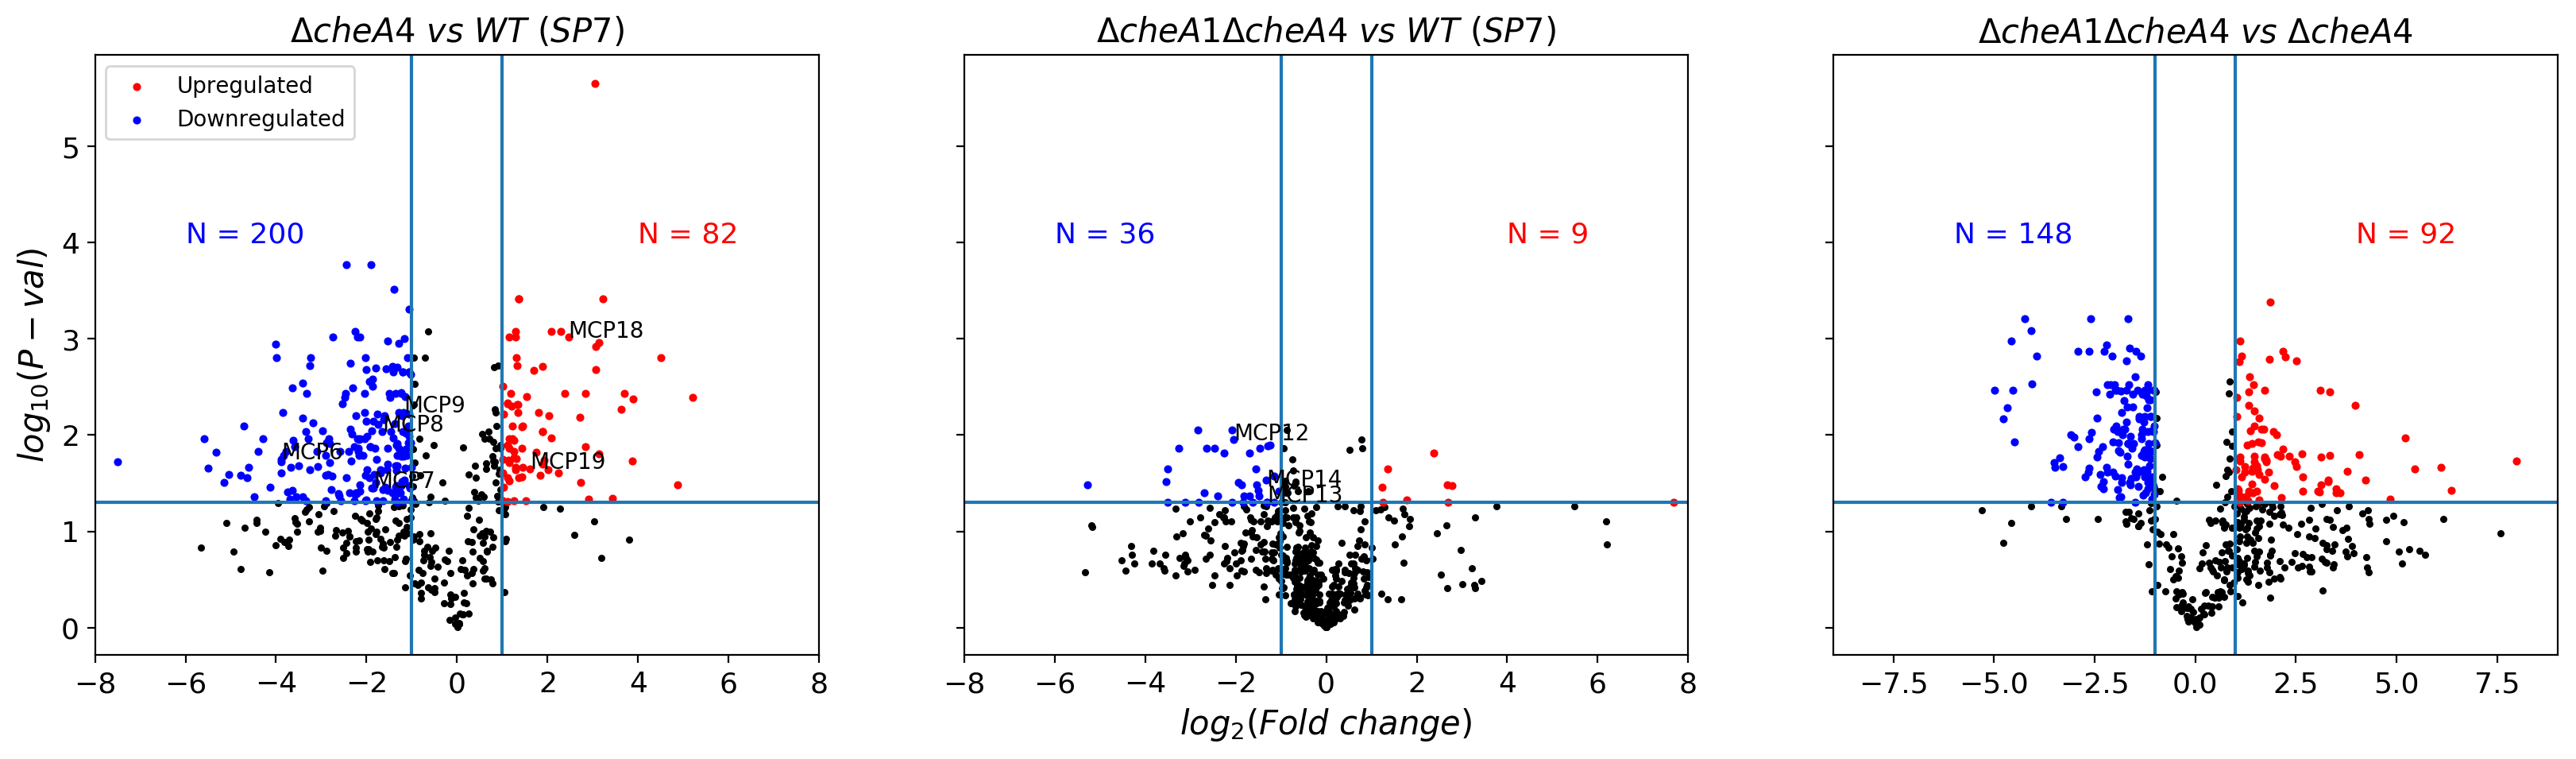

In [98]:
# Layer 1: this layer will be a black scatter plots with all the
# log2 fold-change in the x-axis and the log10 p-values that are corrected.

###################################################

fig, ([ax1,ax2,ax3]) = plt.subplots(nrows=1, ncols=3, figsize=(20,5), sharey=True)

ax1.scatter(np.log2(mean_A4/mean_sp7),  -np.log10(qvs_A4vssp7[1]), color='k', s=5)
ax2.scatter(np.log2(mean_A1A4/mean_sp7),  -np.log10(qvs_A1A4vssp7[1]), color='k', s=5)
ax3.scatter(np.log2(mean_A1A4/mean_A4),  -np.log10(qvs_A1A4vsA4[1]), color='k', s=5)

###################################################
# Layer 2: adding the down-regulated and up-regulated proteins expression profiles.
# Down regulated will be blue and up regulated will be red.

###################################################
#For A4 vs SP7
#Upregulated genes 
up_index = []
for i, value in enumerate(list(data_DEPs['log2_A4/sp7'])):
    if value > 1 and -np.log10(data_DEPs['p_correct_A4vssp7'][i]) > -np.log10(0.05):
        up_index.append(i)
        
#Downregulated genes
down_index = []
for i, value in enumerate(list(data_DEPs['log2_A4/sp7'])):
    if value < -1  and -np.log10(data_DEPs['p_correct_A4vssp7'][i]) > -np.log10(0.05):
        down_index.append(i)
        
ax1.scatter([data_DEPs['log2_A4/sp7'][i] for i in up_index], -np.log10([data_DEPs['p_correct_A4vssp7'][i] 
                                                                                   for i in up_index]), color='r', s=7, label ='Upregulated')
ax1.scatter([data_DEPs['log2_A4/sp7'][i] for i in down_index], -np.log10([data_DEPs['p_correct_A4vssp7'][i] 
                                                            for i in down_index]), color='b', s=7, label='Downregulated')

A4vsSP7_DEPs_up = len(up_index)
A4vsSP7_DEPs_down = len(down_index)
###################################################
#For A1A4 vs SP7
#Upregulated genes 
up_index = []
for i, value in enumerate(list(data_DEPs['log2_A1A4/sp7'])):
    if value > 1 and -np.log10(data_DEPs['p_correct_A1A4vssp7'][i]) > -np.log10(0.05):
        up_index.append(i)
        
#Downregulated genes
down_index = []
for i, value in enumerate(list(data_DEPs['log2_A1A4/sp7'])):
    if value < -1  and -np.log10(data_DEPs['p_correct_A1A4vssp7'][i]) > -np.log10(0.05):
        down_index.append(i)
        
ax2.scatter([data_DEPs['log2_A1A4/sp7'][i] for i in up_index], -np.log10([data_DEPs['p_correct_A1A4vssp7'][i] 
                                                                                   for i in up_index]), color='r', s=7, label ='Upregulated')
ax2.scatter([data_DEPs['log2_A1A4/sp7'][i] for i in down_index], -np.log10([data_DEPs['p_correct_A1A4vssp7'][i] 
                                                                                     for i in down_index]), color='b', s=7, label='Downregulated')
A1A4vsSP7_DEPs_up = len(up_index)
A1A4vsSP7_DEPs_down = len(down_index)
###################################################
#For A1A4 vs A4
#Upregulated genes 
up_index = []
for i, value in enumerate(list(data_DEPs['log2_A1A4/A4'])):
    if value > 1 and -np.log10(data_DEPs['p_correct_A1A4vsA4'][i]) > -np.log10(0.05):
        up_index.append(i)
        
#Downregulated genes
down_index = []
for i, value in enumerate(list(data_DEPs['log2_A1A4/A4'])):
    if value < -1  and -np.log10(data_DEPs['p_correct_A1A4vsA4'][i]) > -np.log10(0.05):
        down_index.append(i)
        
ax3.scatter([data_DEPs['log2_A1A4/A4'][i] for i in up_index], -np.log10([data_DEPs['p_correct_A1A4vsA4'][i] 
                                                                                   for i in up_index]), color='r', s=7, label ='Upregulated')
ax3.scatter([data_DEPs['log2_A1A4/A4'][i] for i in down_index], -np.log10([data_DEPs['p_correct_A1A4vsA4'][i] 
                                                                                     for i in down_index]), color='b', s=7, label='Downregulated')
A1A4vsA4_DEPs_up = len(up_index)
A1A4vsA4_DEPs_down = len(down_index)
###################################################

# Reseting the axis limits for equalizations
ax1.set_xlim([-8,8])
ax2.set_xlim([-8,8])
ax3.set_xlim([-9,9])

#Adding lines for cut-off:
ax1.axhline(-np.log10(0.05))
ax2.axhline(-np.log10(0.05))
ax3.axhline(-np.log10(0.05))

ax1.axvline(-1)
ax1.axvline(1)

ax2.axvline(-1)
ax2.axvline(1)

ax3.axvline(-1)
ax3.axvline(1)
################################################
#Set legend
ax1.legend(loc='upper left')
################################################
# Labeling axis

ax1.set_title('$\Delta cheA4\ vs\ WT\ (SP7)$', fontsize=15)
ax2.set_title('$\Delta cheA1\Delta cheA4\ vs\ WT\ (SP7)$', fontsize=15)
ax3.set_title('$\Delta cheA1\Delta cheA4\ vs\ \Delta cheA4$', fontsize=15)

ax1.set_ylabel('$log_{10}(P-val)$', fontsize=15)
ax2.set_xlabel('$log_2(Fold\ change)$', fontsize=15)
################################################
# Adding in annotation as needed

ax1.text(s='MCP6',x=-(3.8822596), y=-np.log10(0.017893))
ax1.text(s='MCP7',x=-(1.84582), y=-np.log10(0.0353039))
ax1.text(s='MCP8',x=-(1.65125), y=-np.log10(0.0092056))
ax1.text(s='MCP9',x=-(1.185), y=-np.log10(0.005821))
ax1.text(s='MCP18',x=2.45819, y=-np.log10(0.0009634))
ax1.text(s='MCP19',x=1.612, y=-np.log10(0.02233))

ax2.text(s='MCP12',x=-2.0375, y=-np.log10(0.01118))
ax2.text(s='MCP13',x=-1.3106, y=-np.log10(0.0497))
ax2.text(s='MCP14',x=-1.3226, y=-np.log10(0.034))

# Adding numbers of differentially expressed proteins for up and down-reg:
ax1.text(x= -6, y=4, s='N = ' + str(A4vsSP7_DEPs_down), fontsize=13, color='b')
ax1.text(x= 4, y=4, s='N = ' + str(A4vsSP7_DEPs_up), fontsize=13, color='r')

ax2.text(x= -6, y=4, s='N = ' + str(A1A4vsSP7_DEPs_down), fontsize=13, color='b')
ax2.text(x= 4, y=4, s='N = ' + str(A1A4vsSP7_DEPs_up), fontsize=13, color='r')

ax3.text(x= -6, y=4, s='N = ' + str(A1A4vsA4_DEPs_down), fontsize=13, color='b')
ax3.text(x= 4, y=4, s='N = ' + str(A1A4vsA4_DEPs_up), fontsize=13, color='r')


## Trial 2: Volcano plots of differentially expressed elements

In [99]:
data_cleaned = pd.read_excel('cleaned_trial2.xlsx')
data_cleaned.head()

,Unnamed: 0,CheA1_pBBR_TMX_Rep01,CheA1_pBBR_TMX_Rep02,CheA1_pBBR_TMX_Rep03,CheA1_Rep01,CheA1_Rep02,CheA1_Rep03,sp7_Rep01,sp7_Rep02,sp7_Rep03,Accession,Gene function
0,0,27.678230,28.351285,28.118906,27.011518,27.564398,28.045627,27.414860,27.214066,27.412692,A0A060D8U1,Cold-shock protein (Putative cold-shock DNA-bi...
1,1,29.920970,28.593295,30.462980,30.902809,30.582126,30.702943,30.896710,30.706459,31.226559,A0A060D8W4,50S ribosomal protein L35
2,2,28.021528,26.481954,26.949522,26.466264,28.467305,25.593041,27.428749,27.791901,27.853953,A0A060D9F9,Chemotaxis protein CheY (DNA-binding response ...
3,3,28.515878,27.860462,27.642605,26.758032,26.813398,28.224904,28.262294,26.007408,28.672895,A0A060D9K4,LysR family transcriptional regulator
4,4,28.257412,28.057875,28.354392,28.512585,28.649630,28.435946,27.901150,27.756669,28.366099,A0A060D9N9,Nucleoid-associated protein ABAZ39_01980


In [101]:
data_DEPs = pd.read_excel('cleaned_trial2_analyzed.xlsx')
data_DEPs.head()

,Unnamed: 0,CheA1_pBBR_TMX_Rep01,CheA1_pBBR_TMX_Rep02,CheA1_pBBR_TMX_Rep03,CheA1_Rep01,CheA1_Rep02,CheA1_Rep03,sp7_Rep01,sp7_Rep02,sp7_Rep03,Accession,Gene function,p_correct_A1vssp7,p_correct_A1TMXvssp7,p_correct_A1vsA1TMX,log2_A1/sp7,log2_A1TMX/sp7,log2_A1/A1TMX
0,0,29.682458,28.780629,28.815896,30.209004,29.422380,30.518898,30.092997,30.733791,30.465057,A0A060DBW2,Acyl carrier protein (ACP),0.381844,0.025316,0.095875,-0.380521,-1.337621,0.957100
1,1,26.588165,26.235722,26.671305,28.034110,26.608943,27.684494,28.101245,27.734091,27.279743,A0A060DEF4,Phosphatidylserine decarboxylase proenzyme (EC...,0.628135,0.019331,0.149397,-0.262511,-1.206629,0.944118
2,2,27.146370,27.508063,27.661259,28.390654,27.960768,29.168877,28.979082,29.503765,30.593822,A0A060DFR0,MucR family transcriptional regulator (Transcr...,0.121887,0.032033,0.077444,-1.185457,-2.253659,1.068202
3,3,26.829908,24.609909,24.092496,24.461508,23.922084,26.188228,28.217229,28.071609,27.769660,A0A060DG81,Urease subunit gamma (EC 3.5.1.5) (Urea amidoh...,0.039455,0.073926,0.782729,-3.162226,-2.842062,-0.320164
4,4,31.203365,31.392614,30.631203,30.528273,29.868579,30.030057,30.056165,29.674910,29.384763,A0A060DGY9,Protein HflC,0.190911,0.010952,0.037890,0.437023,1.370448,-0.933425


In [102]:
#Setting index for each mutants for downstream statistical analysis
index = data_cleaned.columns
index_sp7 = index[7:10]
index_A1 = index[4:7]
index_A1pbbrTMX = index[1:4]

In [104]:
# Using the toolbox from the scipy.stats package, we will perform the two-sided Welch's t-test between 
# pairwise comparisions.

p_values_A1sp7 = []
for i in range(0, len(data_cleaned)):
    sp7 = data_cleaned.loc[i][index_sp7].values
    A1 = data_cleaned.loc[i][index_A1].values
    p_values_A1sp7.append(sts.ttest_ind(A1, sp7, equal_var=False).pvalue)

p_values_A1TMXsp7 = []
for i in range(0, len(data_cleaned)):
    sp7 = data_cleaned.loc[i][index_sp7].values
    A1TMX = data_cleaned.loc[i][index_A1pbbrTMX].values
    p_values_A1TMXsp7.append(sts.ttest_ind(A1TMX, sp7, equal_var=False).pvalue)

p_values_A1A1TMX = []
for i in range(0, len(data_cleaned)):
    A1 = data_cleaned.loc[i][index_A1.values]
    A1TMX = data_cleaned.loc[i][index_A1pbbrTMX].values
    p_values_A1A1TMX.append(sts.ttest_ind(A1, A1TMX, equal_var=False).pvalue)

mean_sp7 = np.mean(data_cleaned[index_sp7], axis=1)
mean_A1 = np.mean(data_cleaned[index_A1], axis=1)
mean_A1TMX = np.mean(data_cleaned[index_A1pbbrTMX], axis=1)

Text(-1.642173, 1.7204699350245596, 'MCP11')

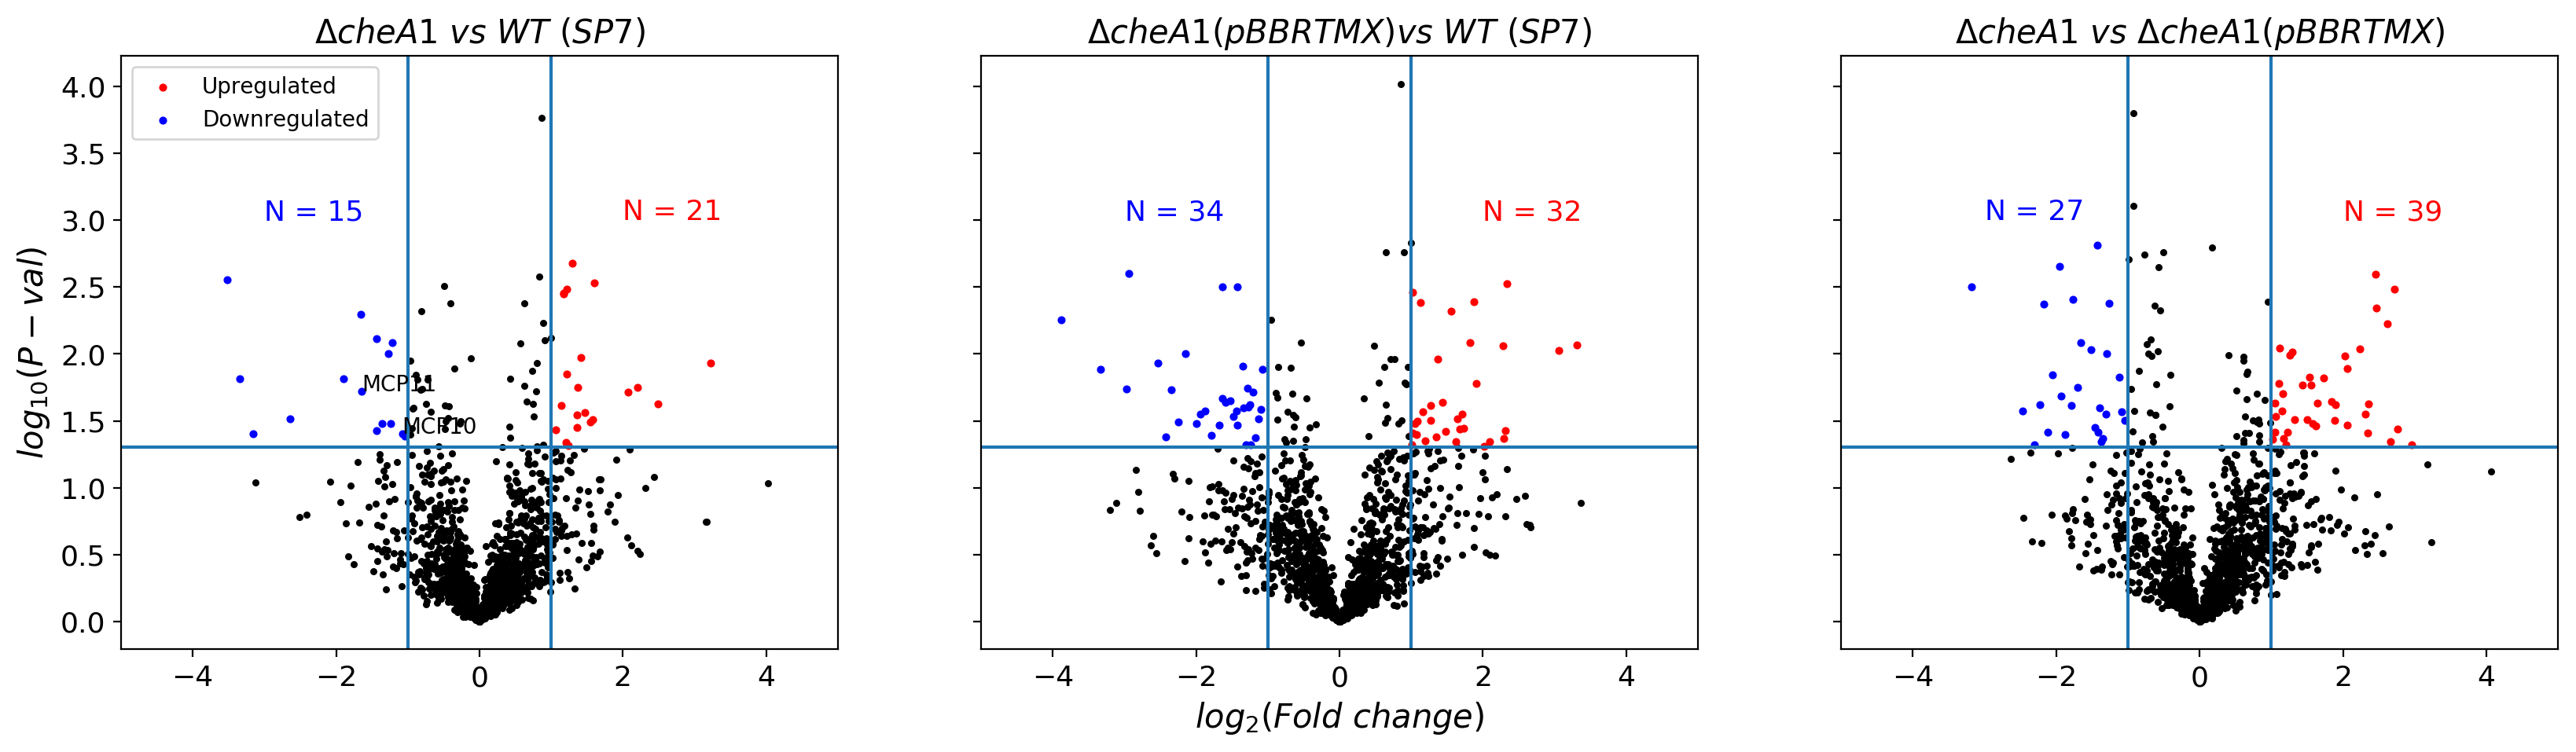

In [117]:
# Layer 1: this layer will be a black scatter plots with all the
# log2 fold-change in the x-axis and the log10 p-values that are corrected.

###################################################

fig, ([ax1,ax2,ax3]) = plt.subplots(nrows=1, ncols=3, figsize=(20,5), sharey=True)

ax1.scatter(mean_A1-mean_sp7,  -np.log10(p_values_A1sp7), color='k', s=5)
ax2.scatter(mean_A1TMX-mean_sp7,  -np.log10(p_values_A1TMXsp7), color='k', s=5)
ax3.scatter(mean_A1-mean_A1TMX,  -np.log10(p_values_A1A1TMX), color='k', s=5)

###################################################
# Layer 2: adding the down-regulated and up-regulated proteins expression profiles.
# Down regulated will be blue and up regulated will be red.

###################################################
#For A1 vs SP7
#Upregulated genes 
up_index = []
for i, value in enumerate(list(data_DEPs['log2_A1/sp7'])):
    if value > 1 and -np.log10(data_DEPs['p_correct_A1vssp7'][i]) > -np.log10(0.05):
        up_index.append(i)
        
#Downregulated genes
down_index = []
for i, value in enumerate(list(data_DEPs['log2_A1/sp7'])):
    if value < -1  and -np.log10(data_DEPs['p_correct_A1vssp7'][i]) > -np.log10(0.05):
        down_index.append(i)
        
ax1.scatter([data_DEPs['log2_A1/sp7'][i] for i in up_index], -np.log10([data_DEPs['p_correct_A1vssp7'][i] 
                                                                                   for i in up_index]), color='r', s=7, label ='Upregulated')
ax1.scatter([data_DEPs['log2_A1/sp7'][i] for i in down_index], -np.log10([data_DEPs['p_correct_A1vssp7'][i] 
                                                            for i in down_index]), color='b', s=7, label='Downregulated')

A1vsSP7_DEPs_up = len(up_index)
A1vsSP7_DEPs_down = len(down_index)
###################################################
#For A1TMX vs SP7
#Upregulated genes 
up_index = []
for i, value in enumerate(list(data_DEPs['log2_A1TMX/sp7'])):
    if value > 1 and -np.log10(data_DEPs['p_correct_A1TMXvssp7'][i]) > -np.log10(0.05):
        up_index.append(i)
        
#Downregulated genes
down_index = []
for i, value in enumerate(list(data_DEPs['log2_A1TMX/sp7'])):
    if value < -1  and -np.log10(data_DEPs['p_correct_A1TMXvssp7'][i]) > -np.log10(0.05):
        down_index.append(i)
        
ax2.scatter([data_DEPs['log2_A1TMX/sp7'][i] for i in up_index], -np.log10([data_DEPs['p_correct_A1TMXvssp7'][i] 
                                                                                   for i in up_index]), color='r', s=7, label ='Upregulated')
ax2.scatter([data_DEPs['log2_A1TMX/sp7'][i] for i in down_index], -np.log10([data_DEPs['p_correct_A1TMXvssp7'][i] 
                                                                                     for i in down_index]), color='b', s=7, label='Downregulated')
A1TMXvsSP7_DEPs_up = len(up_index)
A1TMXvsSP7_DEPs_down = len(down_index)
###################################################
#For A1 vs A1TMX
#Upregulated genes 

up_index = []
for i, value in enumerate(list(data_DEPs['log2_A1/A1TMX'])):
    if value > 1 and -np.log10(data_DEPs['p_correct_A1vsA1TMX'][i]) > -np.log10(0.05):
        up_index.append(i)
        
#Downregulated genes
down_index = []
for i, value in enumerate(list(data_DEPs['log2_A1/A1TMX'])):
    if value < -1  and -np.log10(data_DEPs['p_correct_A1vsA1TMX'][i]) > -np.log10(0.05):
        down_index.append(i)
        
ax3.scatter([data_DEPs['log2_A1/A1TMX'][i] for i in up_index], -np.log10([data_DEPs['p_correct_A1vsA1TMX'][i] 
                                                                                   for i in up_index]), color='r', s=7, label ='Upregulated')
ax3.scatter([data_DEPs['log2_A1/A1TMX'][i] for i in down_index], -np.log10([data_DEPs['p_correct_A1vsA1TMX'][i] 
                                                                                     for i in down_index]), color='b', s=7, label='Downregulated')
A1vsA1TMX_DEPs_up = len(up_index)
A1vsA1TMX_DEPs_down = len(down_index)

###################################################
# Reseting the axis limits for equalizations

ax1.set_xlim([-5,5])
ax2.set_xlim([-5,5])
ax3.set_xlim([-5,5])

#Adding lines for cut-off:
ax1.axhline(-np.log10(0.05))
ax2.axhline(-np.log10(0.05))
ax3.axhline(-np.log10(0.05))

ax1.axvline(-1)
ax1.axvline(1)

ax2.axvline(-1)
ax2.axvline(1)

ax3.axvline(-1)
ax3.axvline(1)

################################################

#Set legend
ax1.legend(loc='upper left')

################################################
# Labeling axis

ax1.set_title('$\Delta cheA1\ vs\ WT\ (SP7)$', fontsize=15)
ax2.set_title('$\Delta cheA1(pBBRTMX) vs\ WT\ (SP7)$', fontsize=15)
ax3.set_title('$\Delta cheA1\ vs\ \Delta cheA1(pBBRTMX)$', fontsize=15)

ax1.set_ylabel('$log_{10}(P-val)$', fontsize=15)
ax2.set_xlabel('$log_2(Fold\ change)$', fontsize=15)

# Adding numbers of differentially expressed proteins for up and down-reg:
ax1.text(x= -3, y=3, s='N = ' + str(A1vsSP7_DEPs_down), fontsize=13, color='b')
ax1.text(x= 2, y=3, s='N = ' + str(A1vsSP7_DEPs_up), fontsize=13, color='r')

ax2.text(x= -3, y=3, s='N = ' + str(A1TMXvsSP7_DEPs_down), fontsize=13, color='b')
ax2.text(x= 2, y=3, s='N = ' + str(A1TMXvsSP7_DEPs_up), fontsize=13, color='r')

ax3.text(x= -3, y=3, s='N = ' + str(A1vsA1TMX_DEPs_down), fontsize=13, color='b')
ax3.text(x= 2, y=3, s='N = ' + str(A1vsA1TMX_DEPs_up), fontsize=13, color='r')

################################################
# Adding in annotation as needed

ax1.text(s='MCP10', x = -1.078561, y=-np.log10(0.039625))
ax1.text(s='MCP11', x = -1.642173, y=-np.log10(0.019034))

## Trial 1: Venn diagrams of differentially expressed proteins

In [12]:
# Gathering index for extracting elements from maindata frame
# Re-initialized variable for dataframes

data_DEPs = pd.read_excel('cleaned_trial1_analyzed.xlsx')

DEPs_A4vssp7 = data_DEPs[(abs(data_DEPs['log2_A4/sp7']) > 1) & (data_DEPs['p_correct_A4vssp7'] < 0.05)]
DEPs_A1A4vssp7 = data_DEPs[(abs(data_DEPs['log2_A1A4/sp7']) > 1) & (data_DEPs['p_correct_A1A4vssp7'] < 0.05)]
DEPs_A1A4vsA4 = data_DEPs[(abs(data_DEPs['log2_A1A4/A4']) > 1) & (data_DEPs['p_correct_A1A4vsA4'] < 0.05)]

DEPs_A4vssp7 = DEPs_A4vssp7['Accession']
DEPs_A1A4vssp7 = DEPs_A1A4vssp7['Accession']
DEPs_A1A4vsA4 = DEPs_A1A4vsA4['Accession']

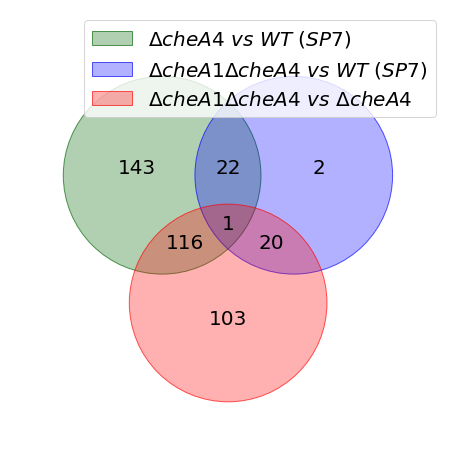

In [14]:
# Venn diagram:
dict_forvenn3 = { '$\Delta cheA4\ vs\ WT\ (SP7)$':set(DEPs_A4vssp7), 
                 '$\Delta cheA1\Delta cheA4\ vs\ WT\ (SP7)$':set(DEPs_A1A4vssp7),
                '$\Delta cheA1\Delta cheA4\ vs\ \Delta cheA4$':set(DEPs_A1A4vsA4)}
venn(dict_forvenn3 , cmap = ['darkgreen', 'blue', 'red'], alpha =0.3, fontsize=20)

## Trial 2: Venn diagrams of differentially expressed proteins

In [16]:
# Gathering index for extracting elements from maindata frame
# Re-initialized variable for dataframes

data_DEPs = pd.read_excel('cleaned_trial2_analyzed.xlsx')

DEPs_A1vssp7 = data_DEPs[(abs(data_DEPs['log2_A1/sp7']) > 1) & (data_DEPs['p_correct_A1vssp7'] < 0.05)]
DEPs_A1TMXvssp7 = data_DEPs[(abs(data_DEPs['log2_A1TMX/sp7']) > 1) & (data_DEPs['p_correct_A1TMXvssp7'] < 0.05)]
DEPs_A1vsA1TMX = data_DEPs[(abs(data_DEPs['log2_A1/A1TMX']) > 1) & (data_DEPs['p_correct_A1vsA1TMX'] < 0.05)]

DEPs_A1vssp7 = DEPs_A1vssp7['Accession']
DEPs_A1TMXvssp7 = DEPs_A1TMXvssp7['Accession']
DEPs_A1vsA1TMX = DEPs_A1vsA1TMX['Accession']

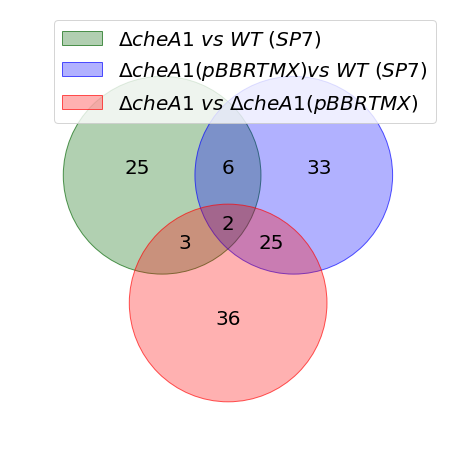

In [18]:
# Venn diagram:
dict_forvenn3 = { '$\Delta cheA1\ vs\ WT\ (SP7)$':set(DEPs_A1vssp7), 
                 '$\Delta cheA1(pBBRTMX) vs\ WT\ (SP7)$':set(DEPs_A1TMXvssp7),
                '$\Delta cheA1\ vs\ \Delta cheA1(pBBRTMX)$':set(DEPs_A1vsA1TMX)}

venn(dict_forvenn3 , cmap = ['darkgreen', 'blue', 'red'], alpha =0.3, fontsize=20)